<a href="https://colab.research.google.com/github/juniobarret/Area-de-Testes/blob/main/Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **dataset: Conjunto de dados de qualidade do vinho**

link: https://www.kaggle.com/datasets/iamsouravbanerjee/planet-dataset

Este conjunto de dados está relacionado com variantes tintas do vinho português "Vinho Verde". O conjunto de dados descreve a quantidade de vários produtos químicos presentes no vinho e os seus efeitos na sua qualidade. Os conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. As classes são ordenadas e não equilibradas (por exemplo, há muito mais vinhos normais do que excelentes ou pobres). A sua tarefa é prever a qualidade do vinho utilizando os dados fornecidos.

Um projecto simples mas desafiante, para antecipar a qualidade do vinho.
A complexidade surge devido ao fato de o conjunto de dados ter menos amostras e ser altamente desequilibrado.
Você consegue superar esses obstáculos e construir um bom modelo preditivo para classificá-los?



Este quadro de dados contém as seguintes colunas:

Variáveis ​​de entrada (com base em testes físico-químicos):\
1 - acidez fixa\
2 - acidez volátil\
3 - ácido cítrico\
4 - açúcar residual\
5 - cloretos\
6 - dióxido de enxofre livre\
7 - dióxido de enxofre total\
8 - densidade\
9 - pH\
10 - sulfatos\
11 - álcool\
Variável de saída (baseada em dados sensoriais):\
12 - qualidade (pontuação entre 0 e 10)

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import sklearn.metrics


In [151]:
# CARREGANDO O DATASET
data = pd.read_csv("/content/Wine.csv")

In [152]:
# Traduzindo os nomes das colunas
data.columns = ['AcidezFixa', 'AcidezVolatil', 'AcidoCitrico', 'AcucarResidual', 'Cloridos',
                'DioxidoEnxofreLivre', 'DioxidoEnxofreTotal', 'Densidade', 'pH', 'Sulfatos',
                'Alcool', 'TipoVinho', 'Qualidade']

In [153]:
# Visualizando as primeiras linhas do dataset
print(data.head())

   AcidezFixa  AcidezVolatil  AcidoCitrico  AcucarResidual  Cloridos  \
0         7.4           0.70          0.00             1.9     0.076   
1         7.8           0.88          0.00             2.6     0.098   
2         7.8           0.76          0.04             2.3     0.092   
3        11.2           0.28          0.56             1.9     0.075   
4         7.4           0.70          0.00             1.9     0.076   

   DioxidoEnxofreLivre  DioxidoEnxofreTotal  Densidade    pH  Sulfatos  \
0                 11.0                 34.0     0.9978  3.51      0.56   
1                 25.0                 67.0     0.9968  3.20      0.68   
2                 15.0                 54.0     0.9970  3.26      0.65   
3                 17.0                 60.0     0.9980  3.16      0.58   
4                 11.0                 34.0     0.9978  3.51      0.56   

   Alcool  TipoVinho  Qualidade  
0     9.4          5          0  
1     9.8          5          1  
2     9.8          5

In [154]:
# Verificando a dimensão do conjunto de dados
print("Dimensões do dataset:", data.shape)

Dimensões do dataset: (1143, 13)


In [155]:
# Verificando o tipo de dados em cada coluna
print("Tipos de dados em cada coluna:")
print(data.dtypes)

Tipos de dados em cada coluna:
AcidezFixa             float64
AcidezVolatil          float64
AcidoCitrico           float64
AcucarResidual         float64
Cloridos               float64
DioxidoEnxofreLivre    float64
DioxidoEnxofreTotal    float64
Densidade              float64
pH                     float64
Sulfatos               float64
Alcool                 float64
TipoVinho                int64
Qualidade                int64
dtype: object


In [156]:
# Verificando se há valores nulos
print("\nContagem de valores nulos:")
print(data.isnull().sum())


Contagem de valores nulos:
AcidezFixa             0
AcidezVolatil          0
AcidoCitrico           0
AcucarResidual         0
Cloridos               0
DioxidoEnxofreLivre    0
DioxidoEnxofreTotal    0
Densidade              0
pH                     0
Sulfatos               0
Alcool                 0
TipoVinho              0
Qualidade              0
dtype: int64


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcidezFixa           1143 non-null   float64
 1   AcidezVolatil        1143 non-null   float64
 2   AcidoCitrico         1143 non-null   float64
 3   AcucarResidual       1143 non-null   float64
 4   Cloridos             1143 non-null   float64
 5   DioxidoEnxofreLivre  1143 non-null   float64
 6   DioxidoEnxofreTotal  1143 non-null   float64
 7   Densidade            1143 non-null   float64
 8   pH                   1143 non-null   float64
 9   Sulfatos             1143 non-null   float64
 10  Alcool               1143 non-null   float64
 11  TipoVinho            1143 non-null   int64  
 12  Qualidade            1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [158]:
# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

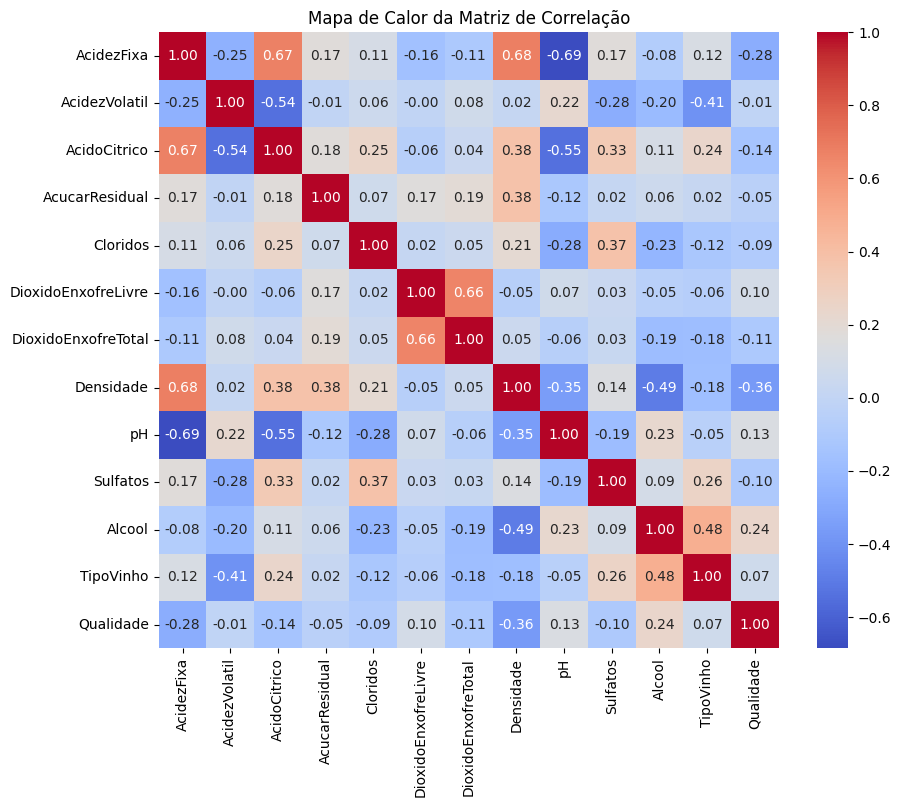

In [159]:
# Plotando o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

In [168]:
# Normalizando os dados
scaler = StandardScaler()
X = data.drop(['TipoVinho', 'Qualidade'], axis=1)
X_scaled = scaler.fit_transform(X)

In [169]:
# Selecionando features
X = data.iloc[:, :-2].values
Y = data.iloc[:, -2].values


In [170]:
# Dividindo X e Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=data['TipoVinho'])


In [171]:
# Verificando dimensões
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (914, 11)
X_test shape: (229, 11)
Y_train shape: (914,)
Y_test shape: (229,)


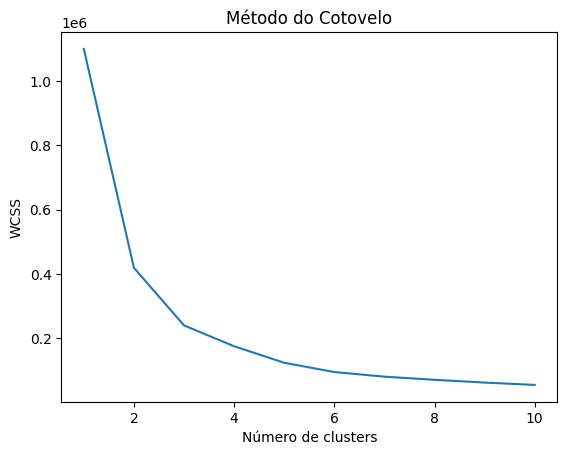

In [172]:
# Método do cotovelo para determinar o número ideal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [173]:
# Ajustando o modelo de KMeans com o número de clusters determinado pelo método do cotovelo
k = 3  # Número de clusters determinado visualmente a partir do método do cotovelo
KMeans_Clustering = KMeans(n_clusters=k, random_state=0)
KMeans_Clustering.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [174]:
# Realizando previsões usando kmeans
kpred = KMeans_Clustering.predict(X_test)

print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test, kpred))

Classification report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       7.0
           5       0.00      0.00      0.00      97.0
           6       0.00      0.00      0.00      92.0
           7       0.00      0.00      0.00      29.0
           8       0.00      0.00      0.00       3.0

    accuracy                           0.00     229.0
   macro avg       0.00      0.00      0.00     229.0
weighted avg       0.00      0.00      0.00     229.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.